In [1]:
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt
import matplotlib.font_manager

In [2]:
title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "w"
background = "#202020"
filler = "#FFFF50"
primary = "#FF6666"

player_1_color="#FF6666"
player_2_color="#3399FF"

In [3]:
bruno_values =   [0.22, 0.25, 0.30, 2.54, 0.43, 5.60, 4.34, 0.29, 0.69, 5.14, 4.97, 1.10]
bruyne_values =  [0.25, 0.52, 0.37, 3.59, 0.41, 6.36, 5.68, 0.57, 1.23, 4.00, 4.54, 1.39]
erikson_values = [0.13, 0.10, 0.35, 3.08, 0.29, 6.23, 5.08, 0.43, 0.67, 3.07, 1.34, 1.06]

In [4]:
# parameter names of the statistics we want to show
params = ["npxG", "Non-Penalty Goals", "xA", "Key Passes", "Through Balls",
          "Progressive Passes", "Shot-Creating Actions", "Goal-Creating Actions",
          "Dribbles Completed", "Pressure Regains", "Touches In Box", "Miscontrol"]

# The lower and upper boundaries for the statistics
low =  [0.08, 0.0, 0.1, 1, 0.6,  4, 3, 0.3, 0.3, 2.0, 2, 0]
high = [0.37, 0.6, 0.6, 4, 1.2, 10, 8, 1.3, 1.5, 5.5, 5, 5]

# Add anything to this list where having a lower number is better
# this flips the statistic
lower_is_better = ['Miscontrol']

In [5]:
radar = Radar(params, low, high,
              lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=8,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=2, center_circle_radius=2)

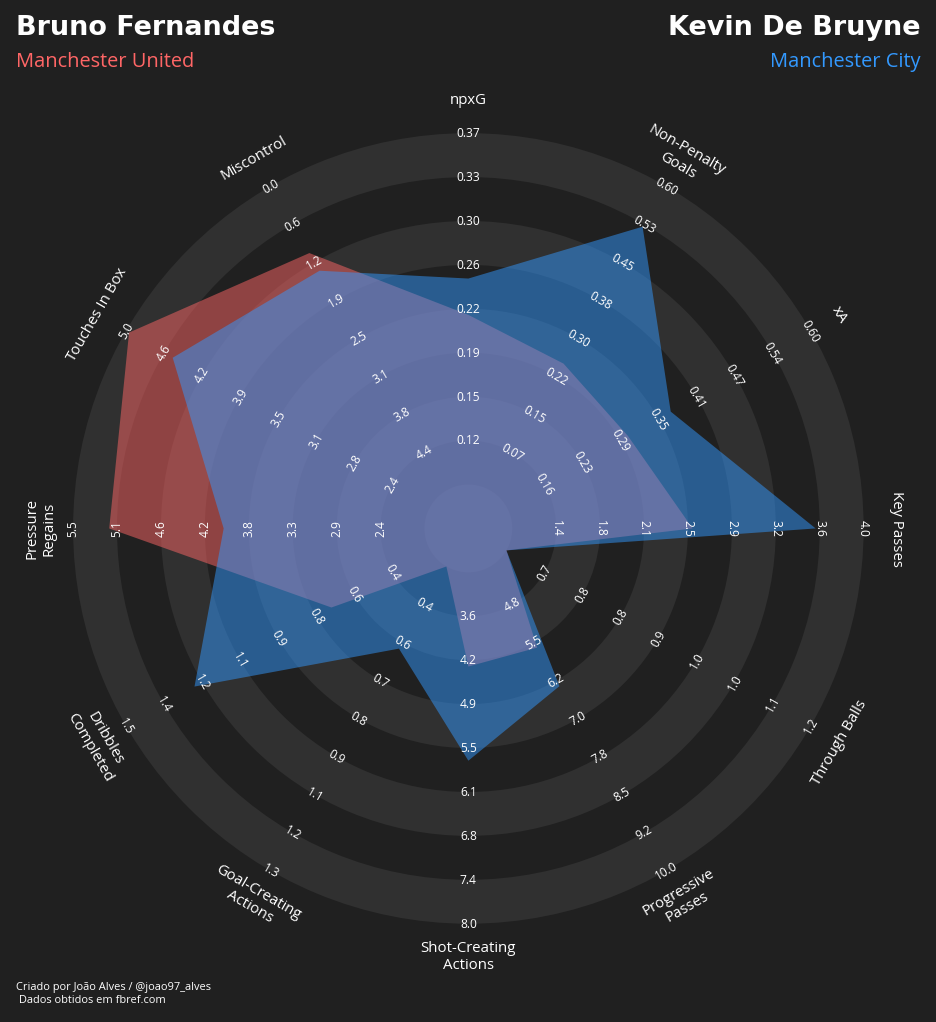

In [8]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'], facecolor=background)  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor="#303030", edgecolor=None, zorder=0)
radar_output = radar.draw_radar_compare(bruno_values, bruyne_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': player_1_color, 'alpha': 0.5},
                                        kwargs_compare={'facecolor': player_2_color, 'alpha': 0.5})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=12,
                                       fontproperties=body_font, color="white", zorder=1)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=body_font, color="white", offset=1.5, zorder=1)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
title1_text = axs['title'].text(0.01, 0.65, 'Bruno Fernandes', fontsize=27, color=text_color, weight="bold",
                                fontproperties=title_font, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.10, 'Manchester United', fontsize=20,
                                fontproperties=body_font,
                                ha='left', va='center', color=player_1_color)
title3_text = axs['title'].text(0.99, 0.65, 'Kevin De Bruyne', fontsize=27, weight="bold",
                                fontproperties=title_font,
                                ha='right', va='center', color=text_color)
title4_text = axs['title'].text(0.99, 0.10, 'Manchester City', fontsize=20,
                                fontproperties=body_font,
                                ha='right', va='center', color=player_2_color)

endnote_text = axs['endnote'].text(0.01, 0.5, 'Criado por João Alves / @joao97_alves \n Dados obtidos em fbref.com', fontsize=11,
                                   fontproperties=body_font, ha='left', color=text_color)


fig.set_facecolor(background)